In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Reading image
img_path = "C:/Files/git/technical-vision/5lab_Image_segmentation/images/"
img_name = "colorful_apples_2.jpg"
img = cv.imread(img_path + img_name, cv.IMREAD_COLOR)

In [4]:
# Convert to CIE Lab color space and then split into components
img_lab = cv.cvtColor(img, cv.COLOR_BGR2Lab)
img_lab_l, img_lab_a, img_lab_b = cv.split(img_lab)

In [5]:
# Set number of color segments
col_seg_num = 4

In [6]:
# Merge 'a' and 'b' components and then reshape it
ab = cv.merge([img_lab_a, img_lab_b])
ab = ab.reshape(-1, 2).astype(np.float32)

In [7]:
# Apply k-means clustering
# Stop criteria is defined as not more than 10 iterations of difference between steps less than 1
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 10, 1.0)
#  Starting points are selected randomly (due to cv2.KMEANS_RANDOM_CENTERS is used) and selection is done 10 times
ret, labels, centers = cv.kmeans(ab, col_seg_num, None, criteria, 10, cv.KMEANS_RANDOM_CENTERS)
# Reshape labels back to an original image
labels = labels.reshape(img_lab_l.shape)

In [8]:
# Segment image to a set of images
segmented_frames = []
for i in range(col_seg_num):
    mask = labels == i
    img_buf = np.zeros_like(img)
    img_buf[mask] = img[mask, :]
    segmented_frames.append(img_buf)

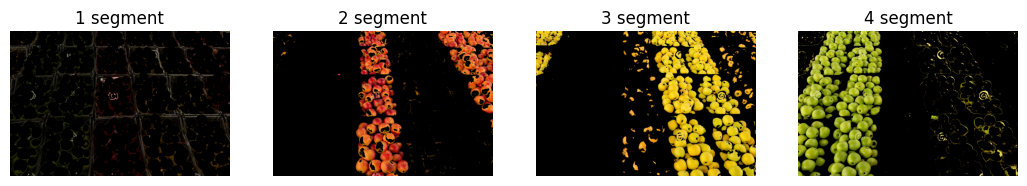

In [9]:
# Show segmented frames
fig = plt.figure(figsize=(13, 9))
for i in range(1, col_seg_num + 1):
    fig.add_subplot(1, 4, i)
    plt.imshow(cv.cvtColor(segmented_frames[i - 1], cv.COLOR_BGR2RGB))
    plt.title(str(i) + " segment")
    plt.axis('off')
    cv.imwrite(img_path + img_name.rpartition('.')[0] + '_' + str(i) + "_segment.jpg", segmented_frames[i - 1])

True

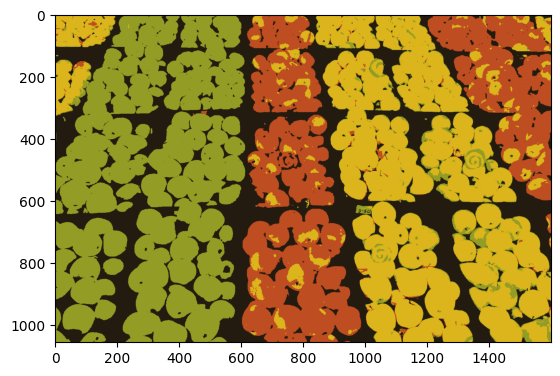

In [10]:
# Construct general photo
# Assign the segments with its mean intensities
img_gen = np.copy(img)
for i in range(col_seg_num):
    mask = labels == i
    img_gen[mask] = np.mean(img[mask], axis=0)
plt.imshow(cv.cvtColor(img_gen, cv.COLOR_BGR2RGB))
cv.imwrite(img_path + img_name.rpartition('.')[0] + "_gen_img.jpg", img_gen)